In [1]:
library(tidyverse)
library(apaTables)
library(sjPlot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 methods overwritten by 'parameters':
  method                           from      
  as.double.parameters_kurtosis    datawizard
  as.double.parameters_skewness    datawizard
  as.double.parameters_smoothness  datawizard
  as.numeric.parameters_kurtosis   datawizard
  as.numeric.parameters_skewness   datawizard
  as.numeric.parameters_smoothness datawizard
  print.parameters_distribution    datawizard
  print.parameters_kurtosis        datawizard
  print.parameters_skewness        datawizard
  summary.parameters_kurtosis      datawizard
  summary.parameters_skewness      datawizard

Learn more

In [2]:
library(dataedu)

These libraries need to be loaded for us to do walk through 1. 

In [3]:
# Pre-survey for the F15 and S16 semesters

pre_survey <- dataedu::pre_survey

In [4]:
# Gradebook and log-trace data for F15 and S16 semesters

course_data <- dataedu::course_data

# Log-trace data for F15 and S16 semesters - this is for time spent

course_minutes <- dataedu::course_minutes

In [5]:
pre_survey

opdata_username,opdata_CourseID,Q1MaincellgroupRow1,Q1MaincellgroupRow2,Q1MaincellgroupRow3,Q1MaincellgroupRow4,Q1MaincellgroupRow5,Q1MaincellgroupRow6,Q1MaincellgroupRow7,Q1MaincellgroupRow8,Q1MaincellgroupRow9,Q1MaincellgroupRow10
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
_80624_1,FrScA-S116-01,4,4,4,1,5,4,1,5,5,5
_80623_1,BioA-S116-01,4,4,3,2,4,4,2,3,4,2
_82588_1,OcnA-S116-03,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
_80623_1,AnPhA-S116-01,4,3,3,2,3,3,3,4,2,4
_80624_1,AnPhA-S116-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
_80624_1,AnPhA-S116-02,4,2,2,2,4,4,1,4,4,4
_80624_1,AnPhA-T116-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
_80624_1,BioA-S116-01,5,3,3,1,5,4,1,5,3,4
_80624_1,BioA-T116-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
glimpse(course_data)

Rows: 29,711
Columns: 8
$ CourseSectionOrigID <chr> "AnPhA-S116-01", "AnPhA-S116-01", "AnPhA-S116-01",…
$ Bb_UserPK           <dbl> 60186, 60186, 60186, 60186, 60186, 60186, 60186, 6…
$ Gradebook_Item      <chr> "POINTS EARNED & TOTAL COURSE POINTS", "WORK ATTEM…
$ Grade_Category      <chr> NA, NA, NA, "Hw", "Hw", "Qz", "Qz", "Hw", "Hw", "H…
$ FinalGradeCEMS      <dbl> 86.272, 86.272, 86.272, 86.272, 86.272, 86.272, 86…
$ Points_Possible     <dbl> 5, 30, 105, 140, 5, 5, 20, 50, 10, 50, 5, 5, 24, 1…
$ Points_Earned       <dbl> 4.050, 24.000, 71.675, 140.970, 5.000, 4.000, NA, …
$ Gender              <chr> "F", "F", "F", "F", "M", "F", "F", "F", "F", "F", …


In [7]:
glimpse(course_minutes)

Rows: 598
Columns: 3
$ Bb_UserPK           <dbl> 44638, 54346, 57981, 66740, 67920, 85355, 85644, 8…
$ CourseSectionOrigID <chr> "OcnA-S116-01", "OcnA-S116-01", "OcnA-S116-01", "O…
$ TimeSpent           <dbl> 1382.7001, 1191.3836, 3343.3333, 965.2994, 4094.99…


In [8]:
pre_survey  <-
  pre_survey  %>%
  # Rename the qustions something easier to work with because R is case sensitive
  # and working with variable names in mix case is prone to error
  rename(
    q1 = Q1MaincellgroupRow1,
    q2 = Q1MaincellgroupRow2,
    q3 = Q1MaincellgroupRow3,
    q4 = Q1MaincellgroupRow4,
    q5 = Q1MaincellgroupRow5,
    q6 = Q1MaincellgroupRow6,
    q7 = Q1MaincellgroupRow7,
    q8 = Q1MaincellgroupRow8,
    q9 = Q1MaincellgroupRow9,
    q10 = Q1MaincellgroupRow10
  ) %>%
  # Convert all question responses to numeric
  mutate_at(vars(q1:q10), list( ~ as.numeric(.)))

In [9]:
# Dataset of students
df <- tibble(
  male = 5, 
  female = 5
)

# Use mutate to create a new column called "total_students" 
  # populate that column with the sum of the "male" and "female" variables
df %>% mutate(total_students = male + female)

male,female,total_students
<dbl>,<dbl>,<dbl>
5,5,10


In [10]:
# Dataset of students
df <- tibble(
  male = 5, 
  female = 5
)
df

male,female
<dbl>,<dbl>
5,5


In [11]:
# This part of the code is where we write the function:
# Function for reversing scales 
reverse_scale <- function(question) {
  # Reverses the response scales for consistency
  #   Arguments:
  #     question - survey question
  #   Returns: 
  #    a numeric converted response
  # Note: even though 3 is not transformed, case_when expects a match for all
  # possible conditions, so it's best practice to label each possible input
  # and use TRUE ~ as the final statement returning NA for unexpected inputs
  x <- case_when(
    question == 1 ~ 5,
    question == 2 ~ 4,
    question == 3 ~ 3, 
    question == 4 ~ 2,
    question == 5 ~ 1,
    TRUE ~ NA_real_
  )
  x
}

# And here's where we use that function to reverse the scales
# We use the pipe operator %>% here
# Reverse scale for questions 4 and 7
pre_survey <-
  pre_survey %>%
  mutate(q4 = reverse_scale(q4),
         q7 = reverse_scale(q7))

In [12]:
pre_survey$q4



[1]  5  4 NA  4 NA  4 NA  5 NA  4  5  5  5  3  5  4 NA NA  4  4  4 NA  4  4
  [25] NA  3 NA  5  4 NA  4  2  4  5  4  4 NA  4  5  5  3 NA  5  5  4  5  5  4
  [49]  5  4  5 NA  5  5  5  5  5  5  4  4  3 NA NA  4  4  4  5  4  4  5  4 NA
  [73]  5  2  5  5  5 NA  5  4  3 NA  5 NA  5  5  5  3 NA  5  3  5  5  5  5  4
  [97]  4  5 NA NA  4  5  5 NA NA  5  4 NA  2  4  4  4  5  5  5  4  5  5  3  5
 [121] NA  5  4  4  5 NA NA  5  4  5 NA  4  4  5  5  3  5  5  5  4 NA  4 NA  4
 [145]  5  4  4  5  5  5  5  4  5  5 NA  5  4  5  4  4  3  4  4  5 NA  4 NA  4
 [169]  3  4 NA  5  4  5  2  4  5 NA  3  3  4  4 NA  5  4  4 NA  4 NA  5  4 NA
 [193]  4  4  4 NA  4  4  4 NA  5  4  4 NA  5  5 NA  5  4  2  4 NA  5  4  5  5
 [217]  4 NA  4  2  3  5 NA NA  4 NA  2  5  4  5  4  5  4  5  3  5  4  5  4  5
 [241]  5  5  5  4 NA  4 NA  4  5  4  2  5  5  5  3 NA  4 NA  5  4  4  5  2  4
 [265]  5  2 NA  4 NA  5 NA  4  4  4  5  3  4 NA  3  4 NA  3  5  5  5  5  3  5
 [289]  4  4  4  5  5  4  3  4  4  2  5  1 NA NA  4  4  4  4 NA  4 NA  5  4  5
 [313]  5  5  4  4  5  5  5  4 NA  4  1 NA  4  5 NA  5  5  5  5  5 NA  5  5  4
 [337]  4  5  2 NA  4  5  4  5 NA  5  4  4  4  5  5  4  4 NA  5  5  5  4 NA NA
 [361]  5  5  4  5  4 NA  4  4  5  5  4  5  4 NA  5 NA  4  1  2 NA  3  5  4  4
 [385]  4  5  2  3  4  4  4  4  4  3  4  5 NA  4  5 NA  5 NA  5  1  5 NA  5  4
 [409]  4  5  4  4  4  3  3  4  4  4 NA  5  1  5  5  5  4  2  5  4  1  4  4 NA
 [433]  3  3  5  2  4  4  5  5  5  4  4 NA  5  5  5  5  4  3 NA NA NA NA  5 NA
 [457]  4  4  3  3  4  5  4  5 NA  5  5  2  5  4  4  5 NA  3  5  3  4  5  4  4
 [481]  4  5  5  5  5  5  3  3  4 NA  5  4  5  4  4 NA  5 NA  5  5  5  4  4  4
 [505]  5  4  4  1  4  5  3  3  4  5  4  5  5  1  4 NA  4  5  5  4  5  4  5  4
 [529]  4  4  4  4  5  5  4 NA NA  2  4  4  3  4  5 NA  4  5 NA  3  5  4  5  5
 [553]  5  5  4  5  5 NA  4 NA  4  3  5  2  4  5  4  5  5  4  3  2  4  5  4  4
 [577]  3  4  4  5 NA NA  4  5 NA NA  4  3  5  3  5  4  4  5  3  4  4 NA  5  5
 [601]  4  5  5  4  4  5  5  4  1  3  5  5  5  5  4  4  4  4  4  4  5  5  4  5
 [625]  4  4  5  5  4  5 NA NA  4 NA  5  4  4  5 NA  4  4  5  5  5  3  4  5 NA
 [649]  5  5 NA  5  4  5 NA NA  5  5  4  3  5  4  4  5  4 NA NA  4  5  5 NA  5
 [673]  5 NA  5  2  1  4  5 NA  5  5  4  5  5 NA NA  4  5 NA  4  4  5  4 NA  3
 [697]  5  3  5  4  4  5  5  2 NA NA  4  4 NA  4  4 NA NA NA NA  5  4  3  4  4
 [721]  4  4  5 NA  3  5 NA NA  5  4  2  5  5  4  1  4  5  3  2  5  2  5  5  4
 [745] NA  5  5  5  5  5  4  4  4 NA  3  5  5  5  4  4  4  5  5  4  5  5  4  3
 [769]  5  5  5  3  5  5  4  4  5  4  5  5  4  5  4 NA  3 NA  4  4  4  4 NA  4
 [793]  4 NA  5  5 NA NA  4 NA  2  5  5  4  4 NA NA  5  3  4  5  5  2  5  5 NA
 [817]  5  5  4  5  4  3  5  5  5  5  4  5  5 NA  5  5  4  4 NA  5 NA  5  5  5
 [841] NA  4  5 NA NA NA NA NA  3  4  5  3  4  5  5  5  5  5  5  5  5  5  5 NA
 [865]  4  5  5 NA  4  4  5  4  4  4  4 NA  3  4  5  5 NA  4  4  5 NA  3  5 NA
 [889]  3  5  4  4  3  5  4  5  4  5  5  4  4  4  5  4  5  4  4  3  2  3  4  5
 [913]  5 NA  5  5 NA NA  4  5  4  5  4  4  5  4  4  5  4  5 NA  5  3 NA  4 NA
 [937]  5  4  5  5 NA  4  5  5  4  5 NA  4  4  4  4 NA NA  4  5  4  4  4  5  4
 [961]  5 NA NA  5  5  4  4  4 NA  4  4 NA  3  4  4  4  2  4  5  4  5  5  5 NA
 [985] NA  4  3  3  4  4  5  5  4  5  4  5 NA  4  4  3  5 NA  5  5 NA  5 NA  4
[1009]  5  4  4  2  4  4  4  4  1  5  5 NA  5  4  4 NA  4  4  5 NA  4  3 NA  5
[1033] NA NA  4 NA NA  3  5  5  4 NA  4  4 NA NA  4  5  5  5  5  1  5  5  5 NA
[1057]  5  5  4  5  4  5  4  5  3  4  5  4  5  5  5 NA NA  4  4 NA  5  5  4  4
[1081]  4  3 NA  5  5  4 NA  5  5  4  5  4  4 NA  5  5  5  5  5  4  4  4

In [13]:
pre_survey[,c(6,9)] #This gives just the two columns we just changed. This also keeps the tibble.

q4,q7
<dbl>,<dbl>
5,5
4,4
NA,NA
4,3
NA,NA
4,5
NA,NA
5,5
NA,NA


In [14]:
pre_survey

opdata_username,opdata_CourseID,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
_80624_1,FrScA-S116-01,4,4,4,5,5,4,5,5,5,5
_80623_1,BioA-S116-01,4,4,3,4,4,4,4,3,4,2
_82588_1,OcnA-S116-03,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
_80623_1,AnPhA-S116-01,4,3,3,4,3,3,3,4,2,4
_80624_1,AnPhA-S116-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
_80624_1,AnPhA-S116-02,4,2,2,4,4,4,5,4,4,4
_80624_1,AnPhA-T116-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
_80624_1,BioA-S116-01,5,3,3,5,5,4,5,5,3,4
_80624_1,BioA-T116-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [15]:
# Pivot the dataset from wide to long format
measure_mean <-
  pre_survey %>%
  # Gather questions and responses
  pivot_longer(cols = q1:q10,
               names_to = "question",
               values_to = "response")

measure_mean

opdata_username,opdata_CourseID,question,response
<chr>,<chr>,<chr>,<dbl>
_80624_1,FrScA-S116-01,q1,4
_80624_1,FrScA-S116-01,q2,4
_80624_1,FrScA-S116-01,q3,4
_80624_1,FrScA-S116-01,q4,5
_80624_1,FrScA-S116-01,q5,5
_80624_1,FrScA-S116-01,q6,4
_80624_1,FrScA-S116-01,q7,5
_80624_1,FrScA-S116-01,q8,5
_80624_1,FrScA-S116-01,q9,5


In [16]:
measure_mean <- measure_mean %>% 
  # Here's where we make the column of question categories called "measure"
  mutate(
    measure = case_when(
      question %in% c("q1", "q4", "q5", "q8", "q10") ~ "int",
      question %in% c("q2", "q6", "q9") ~ "uv",
      question %in% c("q3", "q7") ~ "pc",
      TRUE ~ NA_character_)
  )
measure_mean

opdata_username,opdata_CourseID,question,response,measure
<chr>,<chr>,<chr>,<dbl>,<chr>
_80624_1,FrScA-S116-01,q1,4,int
_80624_1,FrScA-S116-01,q2,4,uv
_80624_1,FrScA-S116-01,q3,4,pc
_80624_1,FrScA-S116-01,q4,5,int
_80624_1,FrScA-S116-01,q5,5,int
_80624_1,FrScA-S116-01,q6,4,uv
_80624_1,FrScA-S116-01,q7,5,pc
_80624_1,FrScA-S116-01,q8,5,int
_80624_1,FrScA-S116-01,q9,5,uv


In [17]:
# Add measure variable 
measure_mean <- measure_mean %>%
  # First, we group by the new variable "measure"
  group_by(measure) %>%
  # Here's where we compute the mean of the responses
  summarize(
    # Creating a new variable to indicate the mean response for each measure
    mean_response = mean(response, na.rm = TRUE),
    # Creating a new variable to indicate the percent of each measure that 
    # had NAs in the response field
    percent_NA = mean(is.na(response))
    )

measure_mean

measure,mean_response,percent_NA
<chr>,<dbl>,<dbl>
int,4.245637,0.1784029
pc,3.646247,0.1778584
uv,3.739146,0.1778584


In [18]:
course_data

CourseSectionOrigID,Bb_UserPK,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,Gender
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
AnPhA-S116-01,60186,POINTS EARNED & TOTAL COURSE POINTS,NA,86.272,5,4.050,F
AnPhA-S116-01,60186,WORK ATTEMPTED,NA,86.272,30,24.000,F
AnPhA-S116-01,60186,0.1: Message Your Instructor,NA,86.272,105,71.675,F
AnPhA-S116-01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272,140,140.970,F
AnPhA-S116-01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272,5,5.000,M
AnPhA-S116-01,60186,1.1: Quiz,Qz,86.272,5,4.000,F
AnPhA-S116-01,60186,1.2: Quiz,Qz,86.272,20,NA,F
AnPhA-S116-01,60186,1.3: Create a Living Creature,Hw,86.272,50,50.000,F
AnPhA-S116-01,60186,1.3: Create a Living Creature - Discussion Board,Hw,86.272,10,NA,F


In [19]:


# split course section into components
course_data <- 
  course_data %>%
  # Give course subject, semester, and section their own columns
  separate(
    col = CourseSectionOrigID,
    into = c("subject", "semester", "section"),
    sep = "-",
    remove = FALSE
  )
course_data

CourseSectionOrigID,subject,semester,section,Bb_UserPK,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,Gender
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
AnPhA-S116-01,AnPhA,S116,01,60186,POINTS EARNED & TOTAL COURSE POINTS,NA,86.272,5,4.050,F
AnPhA-S116-01,AnPhA,S116,01,60186,WORK ATTEMPTED,NA,86.272,30,24.000,F
AnPhA-S116-01,AnPhA,S116,01,60186,0.1: Message Your Instructor,NA,86.272,105,71.675,F
AnPhA-S116-01,AnPhA,S116,01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272,140,140.970,F
AnPhA-S116-01,AnPhA,S116,01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272,5,5.000,M
AnPhA-S116-01,AnPhA,S116,01,60186,1.1: Quiz,Qz,86.272,5,4.000,F
AnPhA-S116-01,AnPhA,S116,01,60186,1.2: Quiz,Qz,86.272,20,NA,F
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature,Hw,86.272,50,50.000,F
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature - Discussion Board,Hw,86.272,10,NA,F


In [20]:
pre_survey <-
  pre_survey %>%
  rename(student_id = opdata_username,
         course_id = opdata_CourseID)

pre_survey

student_id,course_id,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
_80624_1,FrScA-S116-01,4,4,4,5,5,4,5,5,5,5
_80623_1,BioA-S116-01,4,4,3,4,4,4,4,3,4,2
_82588_1,OcnA-S116-03,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
_80623_1,AnPhA-S116-01,4,3,3,4,3,3,3,4,2,4
_80624_1,AnPhA-S116-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
_80624_1,AnPhA-S116-02,4,2,2,4,4,4,5,4,4,4
_80624_1,AnPhA-T116-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
_80624_1,BioA-S116-01,5,3,3,5,5,4,5,5,3,4
_80624_1,BioA-T116-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [21]:
head(pre_survey$student_id)

[1] "_80624_1" "_80623_1" "_82588_1" "_80623_1" "_80624_1" "_80624_1"

In [22]:
# Re-create the variable "student_id" so that it excludes the extraneous characters
pre_survey <- pre_survey %>% 
  mutate(student_id = str_sub(student_id, start = 2, end = -3))

# Save the new variable as numeric so that R no longer thinks it is text 
pre_survey <- pre_survey %>% 
  mutate(student_id = as.numeric(student_id))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [23]:
course_data <-
  course_data %>%
  rename(student_id = Bb_UserPK,
         course_id = CourseSectionOrigID)

In [24]:
course_data

course_id,subject,semester,section,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,Gender
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
AnPhA-S116-01,AnPhA,S116,01,60186,POINTS EARNED & TOTAL COURSE POINTS,NA,86.272,5,4.050,F
AnPhA-S116-01,AnPhA,S116,01,60186,WORK ATTEMPTED,NA,86.272,30,24.000,F
AnPhA-S116-01,AnPhA,S116,01,60186,0.1: Message Your Instructor,NA,86.272,105,71.675,F
AnPhA-S116-01,AnPhA,S116,01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272,140,140.970,F
AnPhA-S116-01,AnPhA,S116,01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272,5,5.000,M
AnPhA-S116-01,AnPhA,S116,01,60186,1.1: Quiz,Qz,86.272,5,4.000,F
AnPhA-S116-01,AnPhA,S116,01,60186,1.2: Quiz,Qz,86.272,20,NA,F
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature,Hw,86.272,50,50.000,F
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature - Discussion Board,Hw,86.272,10,NA,F


In [25]:
dat <-
  left_join(course_data, pre_survey,
            by = c("student_id", "course_id"))
dat

course_id,subject,semester,section,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,⋯,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AnPhA-S116-01,AnPhA,S116,01,60186,POINTS EARNED & TOTAL COURSE POINTS,NA,86.272,5,4.050,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,WORK ATTEMPTED,NA,86.272,30,24.000,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,0.1: Message Your Instructor,NA,86.272,105,71.675,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272,140,140.970,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272,5,5.000,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,1.1: Quiz,Qz,86.272,5,4.000,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,1.2: Quiz,Qz,86.272,20,NA,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature,Hw,86.272,50,50.000,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature - Discussion Board,Hw,86.272,10,NA,⋯,5,4,5,5,5,5,5,5,5,5


In [26]:
dat_semi <- 
  semi_join(course_data,
            pre_survey,
            by = c("student_id", "course_id"))

dat_semi

course_id,subject,semester,section,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,Gender
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
AnPhA-S116-01,AnPhA,S116,01,60186,POINTS EARNED & TOTAL COURSE POINTS,NA,86.272,5,4.050,F
AnPhA-S116-01,AnPhA,S116,01,60186,WORK ATTEMPTED,NA,86.272,30,24.000,F
AnPhA-S116-01,AnPhA,S116,01,60186,0.1: Message Your Instructor,NA,86.272,105,71.675,F
AnPhA-S116-01,AnPhA,S116,01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272,140,140.970,F
AnPhA-S116-01,AnPhA,S116,01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272,5,5.000,M
AnPhA-S116-01,AnPhA,S116,01,60186,1.1: Quiz,Qz,86.272,5,4.000,F
AnPhA-S116-01,AnPhA,S116,01,60186,1.2: Quiz,Qz,86.272,20,NA,F
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature,Hw,86.272,50,50.000,F
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature - Discussion Board,Hw,86.272,10,NA,F


In [27]:

dat_anti <-
  anti_join(course_data,
            pre_survey,
            by = c("student_id", "course_id"))

dat_anti
#Anti and semi should add together to get the number of rows of the original course data
#Think about when you would use semi versus anti
#Anti could be used to find courses or instructors with lots of missing data. 

course_id,subject,semester,section,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,Gender
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
AnPhA-S116-01,AnPhA,S116,01,85865,POINTS EARNED & TOTAL COURSE POINTS,NA,52.1712,460,452.00,F
AnPhA-S116-01,AnPhA,S116,01,85865,WORK ATTEMPTED,NA,52.1712,10,7.00,F
AnPhA-S116-01,AnPhA,S116,01,85865,0.1: Message Your Instructor,NA,52.1712,10,10.00,F
AnPhA-S116-01,AnPhA,S116,01,85865,0.2: Intro Assignment - Discussion Board,Hw,52.1712,249,216.00,M
AnPhA-S116-01,AnPhA,S116,01,85865,0.3: Intro Assignment - Submitting Files,Hw,52.1712,5,5.00,F
AnPhA-S116-01,AnPhA,S116,01,85865,1.1: Quiz,Qz,52.1712,5,5.00,F
AnPhA-S116-01,AnPhA,S116,01,85865,1.2: Quiz,Qz,52.1712,10,9.00,F
AnPhA-S116-01,AnPhA,S116,01,85865,1.3: Create a Living Creature,Hw,52.1712,10,10.00,F
AnPhA-S116-01,AnPhA,S116,01,85865,1.3: Create a Living Creature - Discussion Board,Hw,52.1712,10,10.00,F


In [28]:
dat_right <-
  right_join(course_data,
             pre_survey,
             by = c("student_id", "course_id"))

dat_right
#see the bottom has a bunch of NA rows which are survey responses with no matching course id

course_id,subject,semester,section,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,⋯,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AnPhA-S116-01,AnPhA,S116,01,60186,POINTS EARNED & TOTAL COURSE POINTS,NA,86.272,5,4.050,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,WORK ATTEMPTED,NA,86.272,30,24.000,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,0.1: Message Your Instructor,NA,86.272,105,71.675,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272,140,140.970,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272,5,5.000,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,1.1: Quiz,Qz,86.272,5,4.000,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,1.2: Quiz,Qz,86.272,20,NA,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature,Hw,86.272,50,50.000,⋯,5,4,5,5,5,5,5,5,5,5
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature - Discussion Board,Hw,86.272,10,NA,⋯,5,4,5,5,5,5,5,5,5,5


In [29]:
course_minutes <-
  course_minutes %>%
  rename(student_id = Bb_UserPK,
         course_id = CourseSectionOrigID)

course_minutes <-
  course_minutes %>%
  # Change the data type for student_id in course_minutes so we can match to 
  # student_id in dat
  mutate(student_id = as.integer(student_id))

dat <- 
  dat %>% 
  left_join(course_minutes, 
            by = c("student_id", "course_id"))

In [30]:
dat

course_id,subject,semester,section,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,⋯,q2,q3,q4,q5,q6,q7,q8,q9,q10,TimeSpent
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AnPhA-S116-01,AnPhA,S116,01,60186,POINTS EARNED & TOTAL COURSE POINTS,NA,86.272,5,4.050,⋯,4,5,5,5,5,5,5,5,5,2087.05
AnPhA-S116-01,AnPhA,S116,01,60186,WORK ATTEMPTED,NA,86.272,30,24.000,⋯,4,5,5,5,5,5,5,5,5,2087.05
AnPhA-S116-01,AnPhA,S116,01,60186,0.1: Message Your Instructor,NA,86.272,105,71.675,⋯,4,5,5,5,5,5,5,5,5,2087.05
AnPhA-S116-01,AnPhA,S116,01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272,140,140.970,⋯,4,5,5,5,5,5,5,5,5,2087.05
AnPhA-S116-01,AnPhA,S116,01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272,5,5.000,⋯,4,5,5,5,5,5,5,5,5,2087.05
AnPhA-S116-01,AnPhA,S116,01,60186,1.1: Quiz,Qz,86.272,5,4.000,⋯,4,5,5,5,5,5,5,5,5,2087.05
AnPhA-S116-01,AnPhA,S116,01,60186,1.2: Quiz,Qz,86.272,20,NA,⋯,4,5,5,5,5,5,5,5,5,2087.05
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature,Hw,86.272,50,50.000,⋯,4,5,5,5,5,5,5,5,5,2087.05
AnPhA-S116-01,AnPhA,S116,01,60186,1.3: Create a Living Creature - Discussion Board,Hw,86.272,10,NA,⋯,4,5,5,5,5,5,5,5,5,2087.05


In [31]:
glimpse(dat)

Rows: 40,348
Columns: 22
$ course_id       <chr> "AnPhA-S116-01", "AnPhA-S116-01", "AnPhA-S116-01", "An…
$ subject         <chr> "AnPhA", "AnPhA", "AnPhA", "AnPhA", "AnPhA", "AnPhA", …
$ semester        <chr> "S116", "S116", "S116", "S116", "S116", "S116", "S116"…
$ section         <chr> "01", "01", "01", "01", "01", "01", "01", "01", "01", …
$ student_id      <dbl> 60186, 60186, 60186, 60186, 60186, 60186, 60186, 60186…
$ Gradebook_Item  <chr> "POINTS EARNED & TOTAL COURSE POINTS", "WORK ATTEMPTED…
$ Grade_Category  <chr> NA, NA, NA, "Hw", "Hw", "Qz", "Qz", "Hw", "Hw", "Hw", …
$ FinalGradeCEMS  <dbl> 86.272, 86.272, 86.272, 86.272, 86.272, 86.272, 86.272…
$ Points_Possible <dbl> 5, 30, 105, 140, 5, 5, 20, 50, 10, 50, 5, 5, 24, 10, 1…
$ Points_Earned   <dbl> 4.050, 24.000, 71.675, 140.970, 5.000, 4.000, NA, 50.0…
$ Gender          <chr> "F", "F", "F", "F", "M", "F", "F", "F", "F", "F", "M",…
$ q1              <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ q2           

In [32]:
distinct(dat, Gradebook_Item)

Gradebook_Item
<chr>
POINTS EARNED & TOTAL COURSE POINTS
WORK ATTEMPTED
0.1: Message Your Instructor
0.2: Intro Assignment - Discussion Board
0.3: Intro Assignment - Submitting Files
1.1: Quiz
1.2: Quiz
1.3: Create a Living Creature
1.3: Create a Living Creature - Discussion Board


In [33]:
distinct(dat, course_id, Gradebook_Item)

course_id,Gradebook_Item
<chr>,<chr>
AnPhA-S116-01,POINTS EARNED & TOTAL COURSE POINTS
AnPhA-S116-01,WORK ATTEMPTED
AnPhA-S116-01,0.1: Message Your Instructor
AnPhA-S116-01,0.2: Intro Assignment - Discussion Board
AnPhA-S116-01,0.3: Intro Assignment - Submitting Files
AnPhA-S116-01,1.1: Quiz
AnPhA-S116-01,1.2: Quiz
AnPhA-S116-01,1.3: Create a Living Creature
AnPhA-S116-01,1.3: Create a Living Creature - Discussion Board


In [34]:
dat <-
  distinct(dat, course_id, student_id, .keep_all = TRUE)

In [35]:
dat

course_id,subject,semester,section,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,⋯,q2,q3,q4,q5,q6,q7,q8,q9,q10,TimeSpent
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AnPhA-S116-01,AnPhA,S116,01,60186,POINTS EARNED & TOTAL COURSE POINTS,NA,86.27200,5,4.05,⋯,4,5,5,5,5,5,5,5,5,2087.0501
AnPhA-S116-01,AnPhA,S116,01,66693,POINTS EARNED & TOTAL COURSE POINTS,NA,93.75360,24,24.00,⋯,3,2,4,4,4,4,4,3,4,2309.0334
AnPhA-S116-01,AnPhA,S116,01,66811,POINTS EARNED & TOTAL COURSE POINTS,NA,91.20160,10,10.00,⋯,3,2,4,3,5,3,4,4,4,5298.8507
AnPhA-S116-01,AnPhA,S116,01,66862,POINTS EARNED & TOTAL COURSE POINTS,NA,59.81973,15,12.00,⋯,3,2,4,4,4,4,4,4,4,1746.9667
AnPhA-S116-01,AnPhA,S116,01,67508,POINTS EARNED & TOTAL COURSE POINTS,NA,83.81493,5,5.00,⋯,3,3,4,4,4,4,4,3,3,2668.1830
AnPhA-S116-01,AnPhA,S116,01,70532,POINTS EARNED & TOTAL COURSE POINTS,NA,93.64000,5,5.00,⋯,4,3,4,4,4,3,4,4,5,2938.4666
AnPhA-S116-01,AnPhA,S116,01,77010,POINTS EARNED & TOTAL COURSE POINTS,NA,73.17067,24,10.00,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1533.0996
AnPhA-S116-01,AnPhA,S116,01,85249,POINTS EARNED & TOTAL COURSE POINTS,NA,86.89120,5,4.00,⋯,2,3,5,5,3,4,5,3,3,1209.8496
AnPhA-S116-01,AnPhA,S116,01,85411,POINTS EARNED & TOTAL COURSE POINTS,NA,90.91573,30,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,473.0333


In [36]:
dat <- rename(dat, final_grade = FinalGradeCEMS)

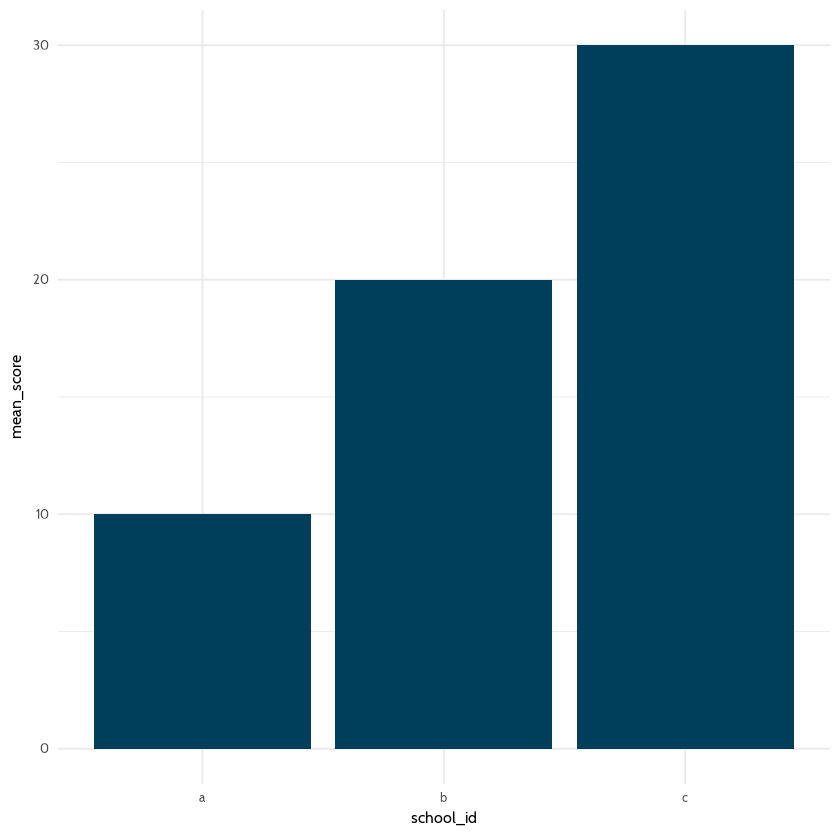

In [37]:
#Ready to start Analysis
# make dataset
students <- 
  tibble(
    school_id = c("a", "b", "c"), 
    mean_score = c(10, 20, 30)
  )

# tell R which dataset to plot and which columns the x-axis and y-axis will represent
students %>% 
  ggplot(aes(x = school_id, y = mean_score)) + 
  # draw the plot
  geom_bar(stat = "identity",
           fill = dataedu_colors("darkblue")) +
  theme_dataedu()

Warning message:
“Removed 30 rows containing missing values (geom_point).”


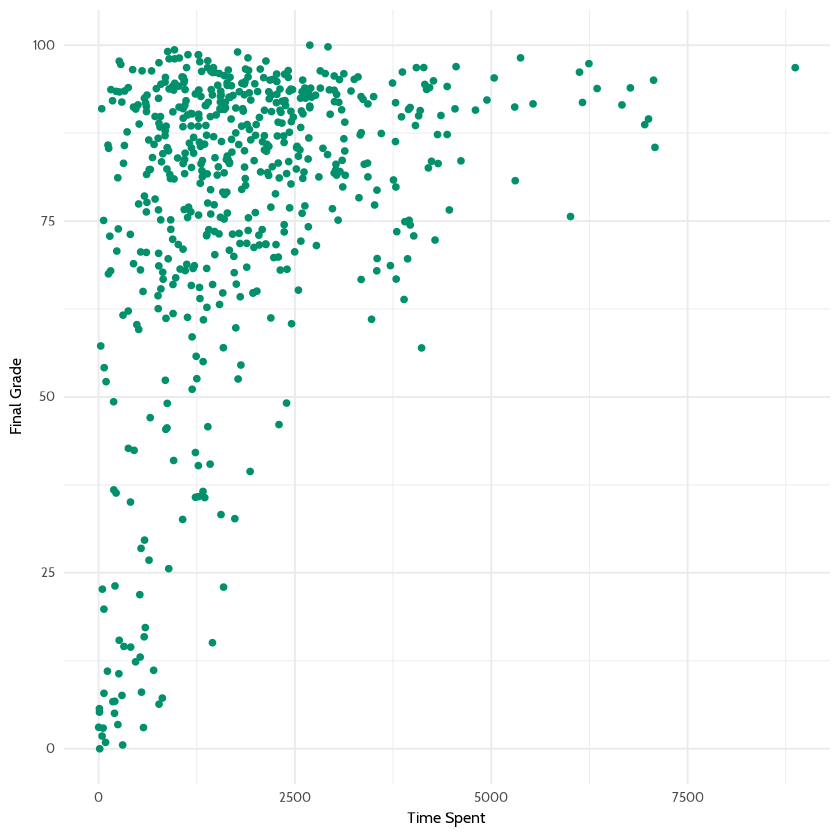

In [38]:
dat %>%
  # aes() tells ggplot2 what variables to map to what feature of a plot
  # Here we map variables to the x- and y-axis
  ggplot(aes(x = TimeSpent, y = final_grade)) + 
  # Creates a point with x- and y-axis coordinates specified above
  geom_point(color = dataedu_colors("green")) + 
  theme_dataedu() +
  labs(x = "Time Spent",
       y = "Final Grade")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 30 rows containing missing values (geom_point).”


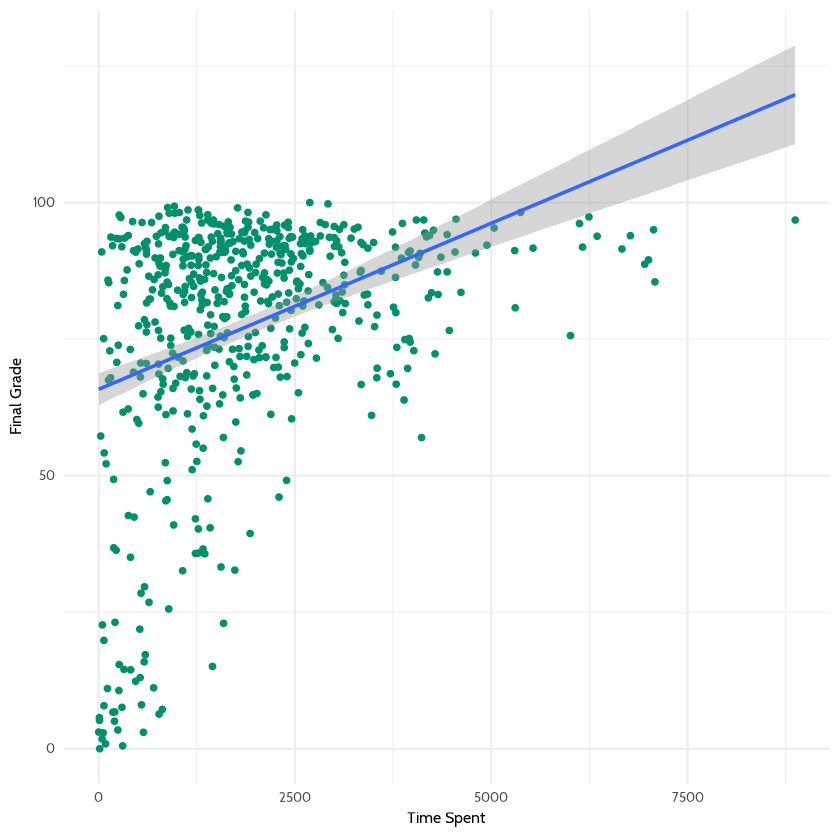

In [39]:
dat %>%
  ggplot(aes(x = TimeSpent, y = final_grade)) +
    geom_point(color = dataedu_colors("green")) + # same as above
  # this adds a line of best fit
  # method = "lm" tells ggplot2 to fit the line using linear regression
  geom_smooth(method = "lm") +
  theme_dataedu() +
  labs(x = "Time Spent",
       y = "Final Grade")

In [40]:
m_linear <-
  lm(final_grade ~ TimeSpent, data = dat)

summary(m_linear)


Call:
lm(formula = final_grade ~ TimeSpent, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.136  -7.805   4.723  14.471  30.317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.581e+01  1.491e+00   44.13   <2e-16 ***
TimeSpent   6.081e-03  6.482e-04    9.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.71 on 571 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.1335,	Adjusted R-squared:  0.132 
F-statistic: 87.99 on 1 and 571 DF,  p-value: < 2.2e-16


In [46]:
tab_model(m_linear,
          title = "Table 7.1", file="Table_7.1.html")

In [48]:
survey_responses <-
  pre_survey %>%
  # Gather questions and responses
  pivot_longer(cols = q1:q10,
               names_to = "question",
               values_to = "response") %>%
  mutate(
    # Here's where we make the column of question categories
    measure = case_when(
      question %in% c("q1", "q4", "q5", "q8", "q10") ~ "int",
      question %in% c("q2", "q6", "q9") ~ "uv",
      question %in% c("q3", "q7") ~ "pc",
      TRUE ~ NA_character_
    )
  ) %>%
  group_by(student_id, measure) %>%
  # Here's where we compute the mean of the responses
  summarize(
    # Mean response for each measure
    mean_response = mean(response, na.rm = TRUE)
    ) %>%
    # Filter NA (missing) responses
  filter(!is.na(mean_response)) %>%
  pivot_wider(names_from = measure, 
              values_from = mean_response)

`summarise()` has grouped output by 'student_id'. You can override using the `.groups` argument.



In [49]:
survey_responses

student_id,int,pc,uv
<dbl>,<dbl>,<dbl>,<dbl>
43146,5.00000,4.500000,4.333333
44638,4.20000,3.500000,4.000000
47448,5.00000,4.000000,3.666667
47979,5.00000,3.500000,5.000000
48797,3.80000,3.500000,3.500000
49147,4.25117,3.731518,3.705729
51943,4.60000,4.000000,4.000000
52326,5.00000,3.500000,5.000000
52446,3.00000,3.000000,3.333333


Where int is *interest*, pc is *pereceived competence*, and uv is *utility value*. 

In [54]:
survey_responses$student_id<-as.factor(survey_responses$student_id) #changed the student_id to factors so ordered but not numeric

survey_responses %>% 
  apa.cor.table()



Means, standard deviations, and correlations with confidence intervals
 

  Variable M    SD   1          2         
  1. int   4.22 0.59                      
                                          
  2. pc    3.60 0.64 .59**                
                     [.53, .64]           
                                          
  3. uv    3.71 0.71 .57**      .50**     
                     [.51, .62] [.43, .56]
                                          

Note. M and SD are used to represent mean and standard deviation, respectively.
Values in square brackets indicate the 95% confidence interval.
The confidence interval is a plausible range of population correlations 
that could have caused the sample correlation (Cumming, 2014).
 * indicates p < .05. ** indicates p < .01.
 


In [55]:
dat <- 
  dat %>% 
  mutate(TimeSpent_hours = TimeSpent / 60)

# the same linear model as above, but with the TimeSpent variable in hours
m_linear_1 <- 
  lm(final_grade ~ TimeSpent_hours, data = dat)

# viewing the output of the linear model
tab_model(m_linear_1,
          title = "Table 7.2", file="Table_7.2.html")

In [56]:
# this is to standardize the TimeSpent variable to have a mean of 0 and a standard deviation of 1
dat <- 
  dat %>% 
  mutate(TimeSpent_std = scale(TimeSpent))

# the same linear model as above, but with the TimeSpent variable standardized
m_linear_2 <- 
  lm(final_grade ~ TimeSpent_std, data = dat)

# viewing the output of the linear model
tab_model(m_linear_2,
          title = "Table 7.3", file="Table_7.3.html")

In [62]:
summary(dat$TimeSpent_hours)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  0.0075  14.1983  25.8485  29.9959  40.4348 147.8481        5 

In [63]:
sd(dat$TimeSpent_hours, na.rm=TRUE)

[1] 22.58217

In [64]:
# a linear model with the subject added 
# independent variables, such as TimeSpent_std and subject, can simply be separated with a plus symbol:
m_linear_3 <- 
  lm(final_grade ~ TimeSpent_std + subject, data = dat)

In [66]:
tab_model(m_linear_3,
          title = "Table 7.4", file="Table_7.4.html") 

In [68]:
# a linear model with the subject added 
# independent variables, such as TimeSpent_std and subject, can simply be separated with a plus symbol:
m_linear_3 <- 
  lm(final_grade ~ TimeSpent_hours + subject, data = dat)
  
tab_model(m_linear_3,
          title = "Table 7.4", file="Table_7.5.html")